In [1]:
from PyUncertainNumber.UC.uncertainNumber import UncertainNumber as UN
from PyUncertainNumber.UC.statisticalInference import *
from PyUncertainNumber.UC.utils import pl_ecdf, pl_pcdf

In [2]:
from intervals import Interval as I
from scipy.stats import CensoredData
import scipy.stats as sps
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2
%load_ext rich
%matplotlib inline

# precise data

## MLE method

In [ ]:
# test data from Scott

datat = 2 * np.random.normal(size=25)

In [ ]:
dist = MLnormal(datat)

In [ ]:
dist

In [ ]:
_ = pl_pcdf(dist, title='Gaussian MLE estimated dist given precise data')

# imprecise data

My current idea will be:

- UN produces pbox via MLE and MoM
- sps still returns precise distribution object anyway.

In [ ]:
scott_rawData = [[8,11], [5.5,6.9], [0.3, 1.3], [3.5,7.5], [0.8,1], [2.8,4.2], [1.8,5.2], [2.2,5.2], [3.5,5.7], [5.3,6.1]]

In [ ]:
''' vanilla scipy imp which looks weird '''
# data_imp = CensoredData(interval=scott_rawData)
# data_imp

In [ ]:
lo_endpoints = [it[0] for it in scott_rawData] # Low ends of the intervals
hi_endpoints = [it[1] for it in scott_rawData] # High ends of the intervals

In [ ]:
data_i = CensoredData.interval_censored(low=lo_endpoints, high=hi_endpoints)
print(data_i)

In [ ]:
''' the same as data_imp '''
data_i

In [ ]:
type(data_i)

In [ ]:
dist_i_scipy = MLnormal(data_i)
# we do get to see the params of a scipy.stats.frozon object
dist_i_scipy.args
# dir(dist_i_scipy)
_ = pl_pcdf(dist_i_scipy, title='Gaussian MLE estimated dist given imprecise data')

#### Exponential distribution tet

In [ ]:
x = I(lo=[1,3], hi=[2,4])
x

## MLE method

In [ ]:
# sth = MLexponential(x)

In [ ]:
type(sth)

In [ ]:
from PyUncertainNumber.UC.intervalOperators import mean

In [ ]:
mean_value = mean(x)
print(type(mean_value))
print(mean_value)

In [ ]:
pba.expon(mean_value).display() 

### bebugging module

In [ ]:
from PyUncertainNumber.pba.interval import Interval as nInterval


def wrapper_decorator(*args, **kwargs):
    i_args = [nInterval(arg)
              for arg in args if not isinstance(arg, nInterval | Interval)]
    if i_args == []:
        i_args = list(args)
    return i_args

In [ ]:
mean_value

In [ ]:
sth = wrapper_decorator([2,3])
sth

In [ ]:
sth2 = wrapper_decorator(mean_value)

In [ ]:
from PyUncertainNumber.pba.pbox import _get_bounds
from PyUncertainNumber.pba.pbox_base import Pbox

In [ ]:
_get_bounds(sth2)

In [ ]:
Left, Right, mean, var = _get_bounds(function_name='expon')

Pbox(
    Left,
    Right,
    shape='expon',
    mean_left=mean.left,
    mean_right=mean.right,
    var_left=var.left,
    var_right=var.right,
).display()

In [ ]:
''' test the mean function '''
# mean([1,2])

In [ ]:
# test nInterval compatibility

ni = pba.I([2,3])
ni

In [ ]:
# pba.expon([2,3]).display()    # worked
# pba.expon(mean(x)).display()  # not working
pba.expon(ni).display()

In [4]:
a = [0, 1]
b = [2, 3]

a_i = pba.I(a)
b_i = pba.I(b)

In [5]:
b_i

Interval [2, 3]

Pbox: ~ norm(range=['-11.16', '12.16'], mean=[2.9323, 12.4343], var=[4.0, 9.0])


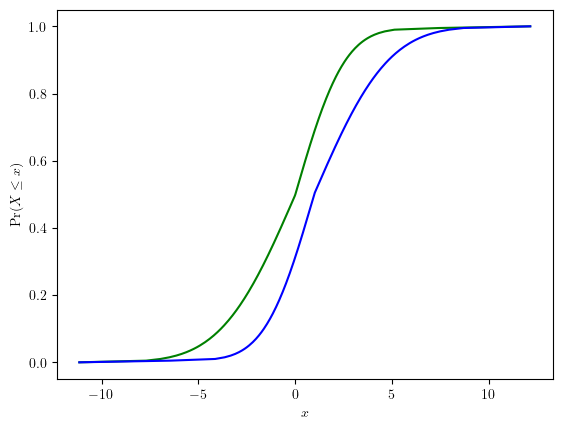

In [6]:
print(pba.norm(a,b))
_ = pba.norm(a,b).display()

In [7]:
pba.norm(a_i, b_i)

Pbox: ~ norm(range=['-3.72', '3.72'], mean=1.0822, var=1.0822)

In [ ]:
print(pba.norm([a,b]))  # incorrect
_ = pba.norm([a,b]).display()

In [ ]:
pba.norm((a,b)) # incorrect

In [8]:
norm(a,b)

Pbox: ~ norm(range=['-11.16', '12.16'], mean=[2.9323, 12.4343], var=[4.0, 9.0])

In [9]:
norm(a_i, b_i)

Pbox: ~ norm(range=['-11.16', '12.16'], mean=[2.9323, 12.4343], var=[4.0, 9.0])

In [ ]:
# lb = sps.expon(loc=2)
# ub = sps.expon(loc=3)

# fig, ax = plt.subplots()
# ax = pl_pcdf(lb, ax=ax)
# _ = pl_pcdf(ub, ax=ax)

## MoM method